In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #encoding numerical values
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:

df=pd.read_csv('/content/customer_churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [3]:
df=df.drop('customerID',axis=1)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,Yes,23,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,Female,0,Yes,No,43,No,No phone service,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,Male,1,No,No,51,Yes,No,DSL,No,Yes,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,Male,1,No,No,72,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,Male,1,No,No,25,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [6]:

x=df.drop('Churn',axis=1)
y=df['Churn']

In [7]:
le = LabelEncoder()

# Iterate over each object type column in x and apply Label Encoding
for column in x.select_dtypes(include='object').columns:
    x[column] = le.fit_transform(x[column])

In [8]:

display(x.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,23,0,1,2,1,1,1,1,1,1,0,1,0,49.85,1146.55
1,0,0,1,0,43,0,1,0,2,0,2,0,2,0,0,0,3,100.70,4330.10
2,1,1,0,0,51,1,0,0,0,2,2,2,0,0,1,0,2,97.33,4963.83
3,1,1,0,0,72,1,2,0,2,0,2,0,0,0,0,0,1,101.38,7299.36
4,1,1,0,0,25,1,2,0,0,0,0,2,0,2,0,0,2,52.22,1305.50


In [9]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3) # max_depth=3 means the tree will make at most 3 decisions (splits) to classify an instance. This helps prevent overfitting.
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [11]:
score=model.score(x_test,y_test)
print(f"Accuracy Score:{score*100:.2f}%")

Accuracy Score:53.66%


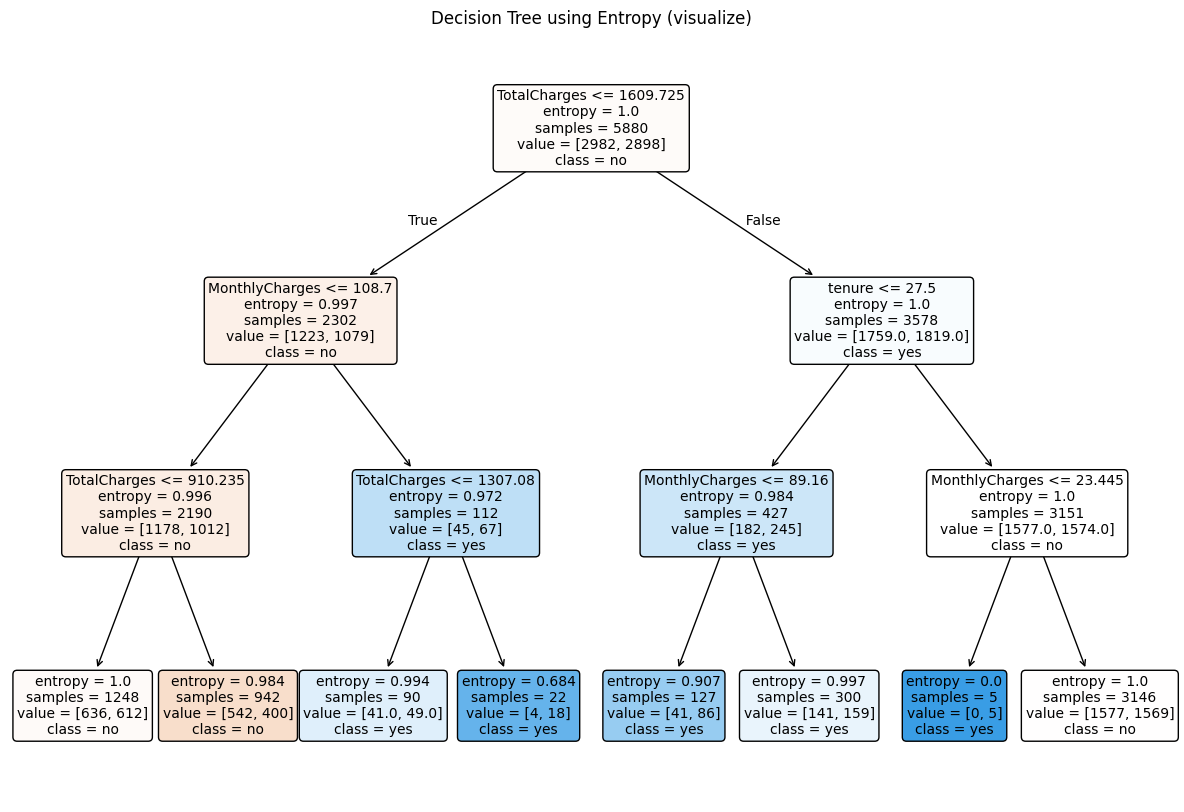

In [12]:
plt.figure(figsize=(15,10))
plot_tree(model,
          filled=True,
          feature_names=x.columns.tolist(), # Corrected: Use actual column names from x
          class_names=['no','yes'],
          rounded=True,
          fontsize=10)
plt.title("Decision Tree using Entropy (visualize)")
plt.show()